# CLASE 1.4: COMPARACIÓN, ORDENAMIENTO Y REEMPLAZO DE ARREGLOS.
---

## Operadores de comparación.
Cuando comenzamos a estudiar las operaciones aritméticas sobre arreglos de **Numpy**, introducimos el conjunto de función universal (ufunc). Vimos que el uso de `+`, `-`, `*`, `/` y otros operadores nos permitían generar operaciones elemento a elemento en los arreglos (siguiendo, por supuesto, las reglas de broadcasting). **Numpy** también tiene disponibles operadores de comparación, tales como `<` (menor que) y `>` (mayor que), los cuales también operan elemento a elemento. El resultado de estos operadores de comparación es siempre un arreglo con valores de tipo Booleano.


Veamos este tipo de operaciones mediante ejemplos de código:

In [1]:
import numpy as np

In [2]:
# Creamos un arreglo unidimensional (que llamamos x).
x = np.arange(start=1, stop=10, step=1)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
# Mayor que.
x > 3

array([False, False, False,  True,  True,  True,  True,  True,  True])

In [4]:
# Menor que.
x < 3

array([ True,  True, False, False, False, False, False, False, False])

In [5]:
# Mayor o igual que.
x >= 3

array([False, False,  True,  True,  True,  True,  True,  True,  True])

In [6]:
# Menor o igual que.
x <= 3

array([ True,  True,  True, False, False, False, False, False, False])

In [7]:
# No es igual a.
x != 3

array([ True,  True, False,  True,  True,  True,  True,  True,  True])

In [8]:
# Es igual a.
x == 3

array([False, False,  True, False, False, False, False, False, False])

Vemos pues que la aplicación de cualquier operador de comparación sobre un arreglo verifica la condición a revisar definida por dicho operador, elemento a elemento, y devuelve como respuesta un arreglo de la misma geometría que el original, cuyos elementos son Booleanos, y denotarán un valor cierto (`True`) si la condición revisada efectivamente cumple, y un valor falso (`False`) si no lo hace.

Es también posible realizar una comparación elemento a elemento considerando dos arreglos, incluyendo, de esta manera, expresiones más compuestas:

In [9]:
# Una expresión comparativa compuesta.
(2*x) == (x - 2*x + x**2)

array([False, False,  True, False, False, False, False, False, False])

Tal y como en el caso de los operaciones aritméticos, y las funciones trigonométricas, logarítmicas, etc., estos operadores de comparación pueden aplicarse en arreglos independientemente de su tamaño o número de dimensiones. Por ejemplo, en el caso de un arreglo bidimensional, podemos tener:

In [10]:
# Generamos una semilla aleatoria fija.
rng = np.random.default_rng(10)

In [11]:
# Construimos un arreglo bidimensional.
M = rng.integers(low=1, high=10, size=(4, 4))
M

array([[7, 9, 3, 2],
       [8, 8, 5, 2],
       [8, 5, 2, 2],
       [4, 7, 4, 8]])

In [12]:
# Los operadores de comparación pueden aplicarse sin problemas sobre este arreglo bidimensional.
M <= 5

array([[False, False,  True,  True],
       [False, False,  True,  True],
       [False,  True,  True,  True],
       [ True, False,  True, False]])

Vemos pues que el resultado de la operación `M <= 5` es, como cabría esperar, un arreglo con elementos Booleanos, con la misma geometría del arreglo original.

## Funciones con resultado Booleano.
Dado un arreglo arbitrario, **Numpy** nos provee de una serie de funciones que nos permiten realizar consultas sobre la data almacenada en ellos, y cuyas salidas corresponden a arreglos con elementos Booleanos. Para ejemplificar su uso, trabajaremos con el arreglo bidimensional `M` que definimos previamente.

Los valores Booleanos en **Numpy** representan siempre valores binarios, con la convención de que el valor `True` es igual a 1, y el valor `False` es igual a 0. De esta manera, los elementos de un arreglo Booleano siempre podrán sumarse, a fin de conocer cuántos de esos elementos cumplen con una determinada condición impuesta mediante algún operador de comparación.

Un ejemplo sencillo sería consultar cuántos elementos de `M` cumplen con la condición `M > 5`. Esto podemos hacerlo fácilmente usando la función `np.sum()`, aprovechando incluso que esta función permite construir agregaciones:

In [13]:
# Conteo de elementos del arreglo x que cumplen con la condición x > 5.
np.sum(M > 5)

7

In [14]:
# Conteo de elementos del arreglo x que cumplen con la condición x > 5, verificados en cada fila.
np.sum(M > 5, axis=1)

array([2, 2, 1, 2])

In [15]:
# Conteo de elementos del arreglo x que cumplen con la condición x > 5, verificados en cada columna.
np.sum(M > 5, axis=0)

array([3, 3, 0, 1])

Naturalmente, podemos estar interesados en saber si alguno o todos los elementos de un determinado arreglo cumplen con alguna condición. Para ello, podemos utilizar las funciones `np.any()` o `np.all()`, respectivamente:

In [16]:
# ¿Hay algún valor mayor que 8?
np.any(M > 8)

True

In [17]:
# ¿Hay algún valor menor que cero?
np.any(M < 0)

False

In [18]:
# ¿Son todos los valores menores que 10?
np.all(M < 10)

True

In [19]:
# ¿Son todos los valores iguales a 6?
np.all(M == 6)

False

In [20]:
# ¿Son todos los valores en cada fila menores que 8?
np.all(M < 8, axis=1)

array([False, False, False, False])

In [21]:
# ¿Hay algún valor en cada columna menor que 6?
np.any(M < 4, axis=0)

array([False, False,  True,  True])

## Operadores Booleanos.

Los operadores Booleanos permiten, mediante el uso de ciertos símbolos, conectar dos proposiciones o sentencias lógicas a fin de construir proposiciones compuestas cuyo resultado es algún valor de verdad (Booleano). **Numpy** nos provee de varias `ufuncs` que emulan el comportamiento de estos operadores lógicos mediante el correspondiente símbolo utilizado normalmente en Python para la ejecución de este tipo de operaciones. Tales símbolos son `&`, `|`, `^` y `~`, los que se corresponden con las operaciones ”AND”, “OR”, “XOR” y “NOT”. Las respectivas funciones universales de **Numpy** (elemento a elemento) que se corresponden con estos operadores son las que se muestran en la Tabla (4.1).

<p style="text-align: center;">Tabla (4.1): Operadores Booleanos de Numpy</p>

| Operador | `ufunc` equivalente |
| -------- | ------------------- |
| `&`      | `np.bitwise_and()`  |
| `^`      | `np.bitwise_xor()`  |
| `~`      | `np.bitwise_not()`  |

Veamos como trabajan estos operadores por medio de un ejemplo:

In [22]:
# Construimos un arreglo que emula el histórico de rendimiento de un chancador primario 
# durante los últimos 100 días.
hist = rng.normal(loc=1250, scale=750, size=100) + 3600

In [23]:
# Realizamos algunas consultas relativas a esta data.
print(f"Número de días con procesamiento menor a 4000 tph = {np.sum(hist < 4000)}")
print(f"Número de días con procesamiento entre 4500 y 5500 tph = {np.sum((hist >= 4500) & (hist <= 5000))}")
print(f"Número de días con procesamiento sobre 6000 tph o bajo 4000 tph = {np.sum((hist > 6000) | (hist < 4000))}")

Número de días con procesamiento menor a 4000 tph = 13
Número de días con procesamiento entre 4500 y 5500 tph = 32
Número de días con procesamiento sobre 6000 tph o bajo 4000 tph = 16


Notemos que, en el bloque de código anterior, los paréntesis cobran extrema importancia. Esto es debido a que éstos intervienen directamente en la jerarquización de la operación completa. Por lo tanto, en este ejemplo, primero resolvemos las comparaciones, y luego las conjugamos mediante el operador `&`, o bien, las unimos mediante el operador `|`.

## Masking.
En los ejemplos anteriores, verificamos la construcción de agregaciones calculadas directamente sobre arreglos Booleanos. Una herramienta aún más poderosa en **Numpy** corresponde a la utilización de arreglos Booleanos como máscaras o filtros, a fin de seleccionar ciertos subconjuntos bien definidos de la data de nuestro interés. Este proceso se conoce como masking.

Consideremos nuestro arreglo `M`, previamente construido, y supongamos que queremos obtener un sub-arreglo consistente de todos los elementos de `M` que son menores que 4. Para ello, procedemos enmascarando la condición de interés (`M < 4`) entre corchetes. Luego tenemos:

In [24]:
# El arreglo M.
M

array([[7, 9, 3, 2],
       [8, 8, 5, 2],
       [8, 5, 2, 2],
       [4, 7, 4, 8]])

In [25]:
# Obtenemos un arreglo compuesto únicamente por los elementos de M que son menores que 4.
M[M < 4]

array([3, 2, 2, 2, 2])

La selección anterior sigue una lógica bastante sencilla: La condición `M < 4` devuelve un arreglo con elementos Booleanos de las mismas dimensiones que el arreglo original `M`. Por lo tanto, al escribir `M[M < 4]`, el corchete indica que la selección se realizará con respecto a las posiciones del arreglo `M < 4` tales que su valor sea igual a `True`. 

El resultado de una selección mediante masking es siempre un arreglo unidimensional.

## Fancy indexing.
En las secciones previas, aprendimos a acceder y modificar porciones de arreglos mediante la implementación de un indexado sencillo (por ejemplo, `x[0]`), slicing (por ejemplo,` x[:5]`) y masking (por ejemplo, `x[x != 0]`). En esta subsección, echaremos un vistazo a otro estilo muy particular de indexación de arreglos, conocido en la práctica como *fancy indexing*. Este tipo de indexación es parecido al que ya aprendimos, pero esta vez indexamos conforme arreglos completos. Esto nos permite rápidamente acceder a y/o modificar subconjuntos de nuestros arreglos de mayor complejidad.

Este tipo de indexación es conceptualmente simple. Consiste simplemente en pasar un arreglo de índices para acceder a múltiples elementos de un arreglo al mismo tiempo. Por ejemplo, consideremos el siguiente arreglo:

In [26]:
# Creamos el arreglo x.
rng = np.random.default_rng(42)
x = rng.integers(low=1, high=100, size=20)
print(x)

[ 9 77 65 44 43 86  9 70 20 10 53 97 73 76 72 78 51 13 84 45]


Supongamos que queremos acceder a tres diferentes elementos. Podríamos, dado aquello, hacer algo como esto:

In [27]:
[x[13], x[7], x[18]]

[76, 70, 84]

Alternativamente, podemos también pasar un conjunto de índices para obtener el mismo resultado:

In [28]:
indices = [13, 7, 18]
x[indices]

array([76, 70, 84])

Con este esquema de indexación, la geometría de los resultados refleja siempre la geometría de los arreglos que definen los índices, en vez de la geometría del arreglo indexado:

In [29]:
indices = np.array([
    [13, 7],
    [18, 2]
])
x[indices]

array([[76, 70],
       [84, 65]])

El fancy indexing también funciona en dimensiones múltiples. Consideremos el siguiente arreglo:

In [30]:
M = rng.integers(low=1, high=20, size=(6, 6))
M

array([[10,  8,  4, 18, 15, 13],
       [ 8, 16, 11,  9,  9,  5],
       [ 2, 11, 17,  2, 17, 16],
       [ 6, 13,  4, 15, 14,  7],
       [ 2, 19,  9, 17, 13, 15],
       [15,  4,  7,  9, 10,  1]])

Como en el caso del indexado simple, el primer índice se refiere a las filas y el segundo a las columnas:

In [31]:
row = np.array([0, 2, 4])
col = np.array([1, 3, 5])
M[row, col]

array([ 8,  2, 15])

Notemos que el primer valor en el resultado es `M[0, 1]`, el segundo es `M[2, 3]`, y el segundo es `M[4, 5]`. El pareo de índices en el fancy indexing sigue todas reglas verificadas cuando estudiamos el concepto de broadcasting. Siempre es importante recordar que, con el fancy indexing, el valor retornado por la operación de indexado refleja siempre la geometría de los índices transmitidos mediante broadcasting, en vez de la geometría del arreglo que indexamos.

## Ordenamiento de arreglos.
Hasta este punto, hemos considerado el trabajo principalmente con herramientas que nos sirven para acceder y manipular los datos almacenados en nuestros arreglos con **Numpy**. Procederemos ahora a cubrir algunas rutinas que nos permiten generar algún tipo de orden en los elementos que constituyen tales arreglos.

A pesar de que Python tiene disponibles las funciones nativas `sort()` y `sorted()`, las cuales funcionan perfecto en objetos tales como listas, no las discutiremos en este curso debido a que la función `np.sort()` es mucho más eficiente que las alternativas nativas (en tiempo de ejecución). De esta manera, para retornar la versión ordenada de un arreglo, sin modificar nada más, podemos escribir:

In [32]:
# Creamos un arreglo u.
rng = np.random.default_rng(10)
u = rng.integers(low=1, high=20, size=10)
u

array([15, 19,  6,  4, 16, 16, 10,  3, 16, 10])

In [33]:
# Retornamos la versión ordenada del arreglo u.
np.sort(u)

array([ 3,  4,  6, 10, 10, 15, 16, 16, 16, 19])

**Numpy** también nos provee del método `sort()`, aplicable sobre cualquier arreglo, y que también permite ordenar sus elementos. Sin embargo, este método no retorna una copia del arreglo con sus elementos ordenados (como la función `np.sort()`), sino que modifica el arreglo respectivo, ordenando sus elementos: 

In [34]:
# Ordenamos el arreglo u mediante el método sort().
u.sort()
u

array([ 3,  4,  6, 10, 10, 15, 16, 16, 16, 19])

Con frecuencia, estamos interesados en determinar las posiciones relativas a los elementos de un arreglo que, de seleccionarlas, retornan el arreglo ordenado. Para ello, podemos utilizar la función `np.argsort()`:

In [35]:
# Creamos el arreglo v.
v = rng.integers(low=1, high=10, size=10)
v

array([2, 2, 4, 7, 4, 8, 1, 4, 5, 9])

In [36]:
# Determinamos las posiciones de los elementos que permiten ordenar el arreglo.
np.argsort(v)

array([6, 0, 1, 2, 4, 7, 8, 3, 5, 9])

In [37]:
# Estos índices nos permiten listar los elementos ordenadamente en nuestro arreglo.
v[np.argsort(v)]

array([1, 2, 2, 4, 4, 4, 5, 7, 8, 9])

La función `np.sort()` también permite operar de forma agregada. Por lo tanto, es posible ordenar los elementos de un arreglo multidimensional conforme la dirección de cualquiera de sus ejes. Por ejemplo, conforme filas o columnas en un arreglo 2D:

In [38]:
# El arreglo M.
M

array([[10,  8,  4, 18, 15, 13],
       [ 8, 16, 11,  9,  9,  5],
       [ 2, 11, 17,  2, 17, 16],
       [ 6, 13,  4, 15, 14,  7],
       [ 2, 19,  9, 17, 13, 15],
       [15,  4,  7,  9, 10,  1]])

In [39]:
# Ordenamos los elementos que constituyen las columnas de M.
np.sort(M, axis=0)

array([[ 2,  4,  4,  2,  9,  1],
       [ 2,  8,  4,  9, 10,  5],
       [ 6, 11,  7,  9, 13,  7],
       [ 8, 13,  9, 15, 14, 13],
       [10, 16, 11, 17, 15, 15],
       [15, 19, 17, 18, 17, 16]])

In [40]:
# Ordenamos los elementos que constituyen las filas de M.
np.sort(M, axis=1)

array([[ 4,  8, 10, 13, 15, 18],
       [ 5,  8,  9,  9, 11, 16],
       [ 2,  2, 11, 16, 17, 17],
       [ 4,  6,  7, 13, 14, 15],
       [ 2,  9, 13, 15, 17, 19],
       [ 1,  4,  7,  9, 10, 15]])

Debemos tener en consideración que el método anterior asume que tanto las filas como las columnas de un arreglo son arreglos independientes. Por lo tanto, cualquier relación existente entre los elementos del arreglo original no se preserva al generar este tipo de ordenamientos.

A veces no estamos interesados en ordenar un arreglo completamente, sino que simplemente queremos encontrar los `K` valores más pequeños en el mismo. **Numpy** nos provee de la función `np.partition()`, la cual toma como argumentos un arreglo determinado y un número `K`. El resultado que retorna es un nuevo arreglo, con los `K` valores más pequeños situados a la izquierda de esta partición, y los demás elementos a la derecha de `K`, en un orden arbitrario:

In [41]:
# La función np.partition() devuelve un arreglo cuyos primeros K elementos son los de menor magnitud 
# del arreglo original, sin un orden específico, mientras que el resto de los elementos permanecen 
# inalterados.
np.partition(v, 3)

array([1, 2, 2, 4, 4, 8, 7, 4, 5, 9])

Notemos que los primeros tres elementos en el arreglo resultante corresponden a los tres elementos más pequeños del arreglo original, mientras que las posiciones restantes contienen al resto de los elementos. Ambas particiones tienen un orden arbitrario en sus elementos respectivos.

Similarmente al caso del ordenamiento clásico, también podemos particionar elementos conforme cualquier eje estructural de un arreglo:

In [42]:
# Retornamos un arreglo cuyos dos primeros elementos, por columna, son los de menor magnitud.
np.partition(M, 2, axis=0)

array([[ 2,  4,  4,  2,  9,  1],
       [ 2,  8,  4,  9, 10,  5],
       [ 6, 11,  7,  9, 13,  7],
       [10, 13, 11, 15, 14, 16],
       [ 8, 19,  9, 17, 17, 15],
       [15, 16, 17, 18, 15, 13]])

In [43]:
# Retornamos un arreglo cuyos dos primeros elementos, por fila, son los de menor magnitud.
np.partition(M, 2, axis=1)

array([[ 4,  8, 10, 18, 15, 13],
       [ 5,  8,  9, 11,  9, 16],
       [ 2,  2, 11, 17, 17, 16],
       [ 4,  6,  7, 15, 14, 13],
       [ 2,  9, 13, 17, 19, 15],
       [ 1,  4,  7,  9, 10, 15]])

El resultado es un arreglo en el cual los primeros dos elementos de cada fila contienen a los elementos más pequeños en dicha fila, estando en las posiciones restantes el resto de los elementos de cada fila correspondiente, ambos en un orden arbitrario.

Finalmente, de la misma forma que disponemos de la función `np.argsort()` para devolver los índices de los elementos ordenados de un arreglo, también contamos con la función `np.argpartition()`, la cual computa los índices que denotan las posiciones relativas a un partición. Veremos esto en detalle en el siguiente ejemplo.

**Ejemplo 4.1 – El algoritmo de K vecinos más cercanos:** Veamos rápidamente como utilizar la función `np.argsort()` conforme múltiple ejes para encontrar a los vecinos más cercanos de cada punto en un conjunto. Comenzaremos creando un conjunto aleatorio de 20 puntos en un plano, en un arreglo de geometría `(20, 2)`:

In [44]:
# Definimos el arreglo que trabajaremos.
P = rng.uniform(size=(20, 2))
P

array([[0.82533291, 0.33821531],
       [0.57576055, 0.75330186],
       [0.82710394, 0.93343847],
       [0.14499469, 0.74558021],
       [0.13935139, 0.90652876],
       [0.22611443, 0.85323975],
       [0.30631787, 0.96983037],
       [0.51783421, 0.32247456],
       [0.28243352, 0.605865  ],
       [0.33376446, 0.67864877],
       [0.15442507, 0.24977552],
       [0.86989425, 0.60036782],
       [0.26198306, 0.1494149 ],
       [0.13678915, 0.24892094],
       [0.38282467, 0.64907906],
       [0.83756376, 0.77603195],
       [0.33951558, 0.14856874],
       [0.45701939, 0.43786436],
       [0.57421759, 0.37326922],
       [0.63382506, 0.11464436]])

Para tener una idea de como se ven estos puntos en el plano, podemos graficarlos rápidamente usando **Matplotlib**. No ahondaremos en el gráfico demasiado, ya que más adelante abordaremos este tema en detalle. Sin embargo, el código es el siguiente:

In [45]:
# Usamos la librería Matplotlib para graficar estos puntos en el plano.
import matplotlib.pyplot as plt

In [46]:
%matplotlib notebook

In [47]:
# Setting de nuestra figura.
plt.rcParams["figure.dpi"] = 100
plt.style.use("ggplot")

<IPython.core.display.Javascript object>


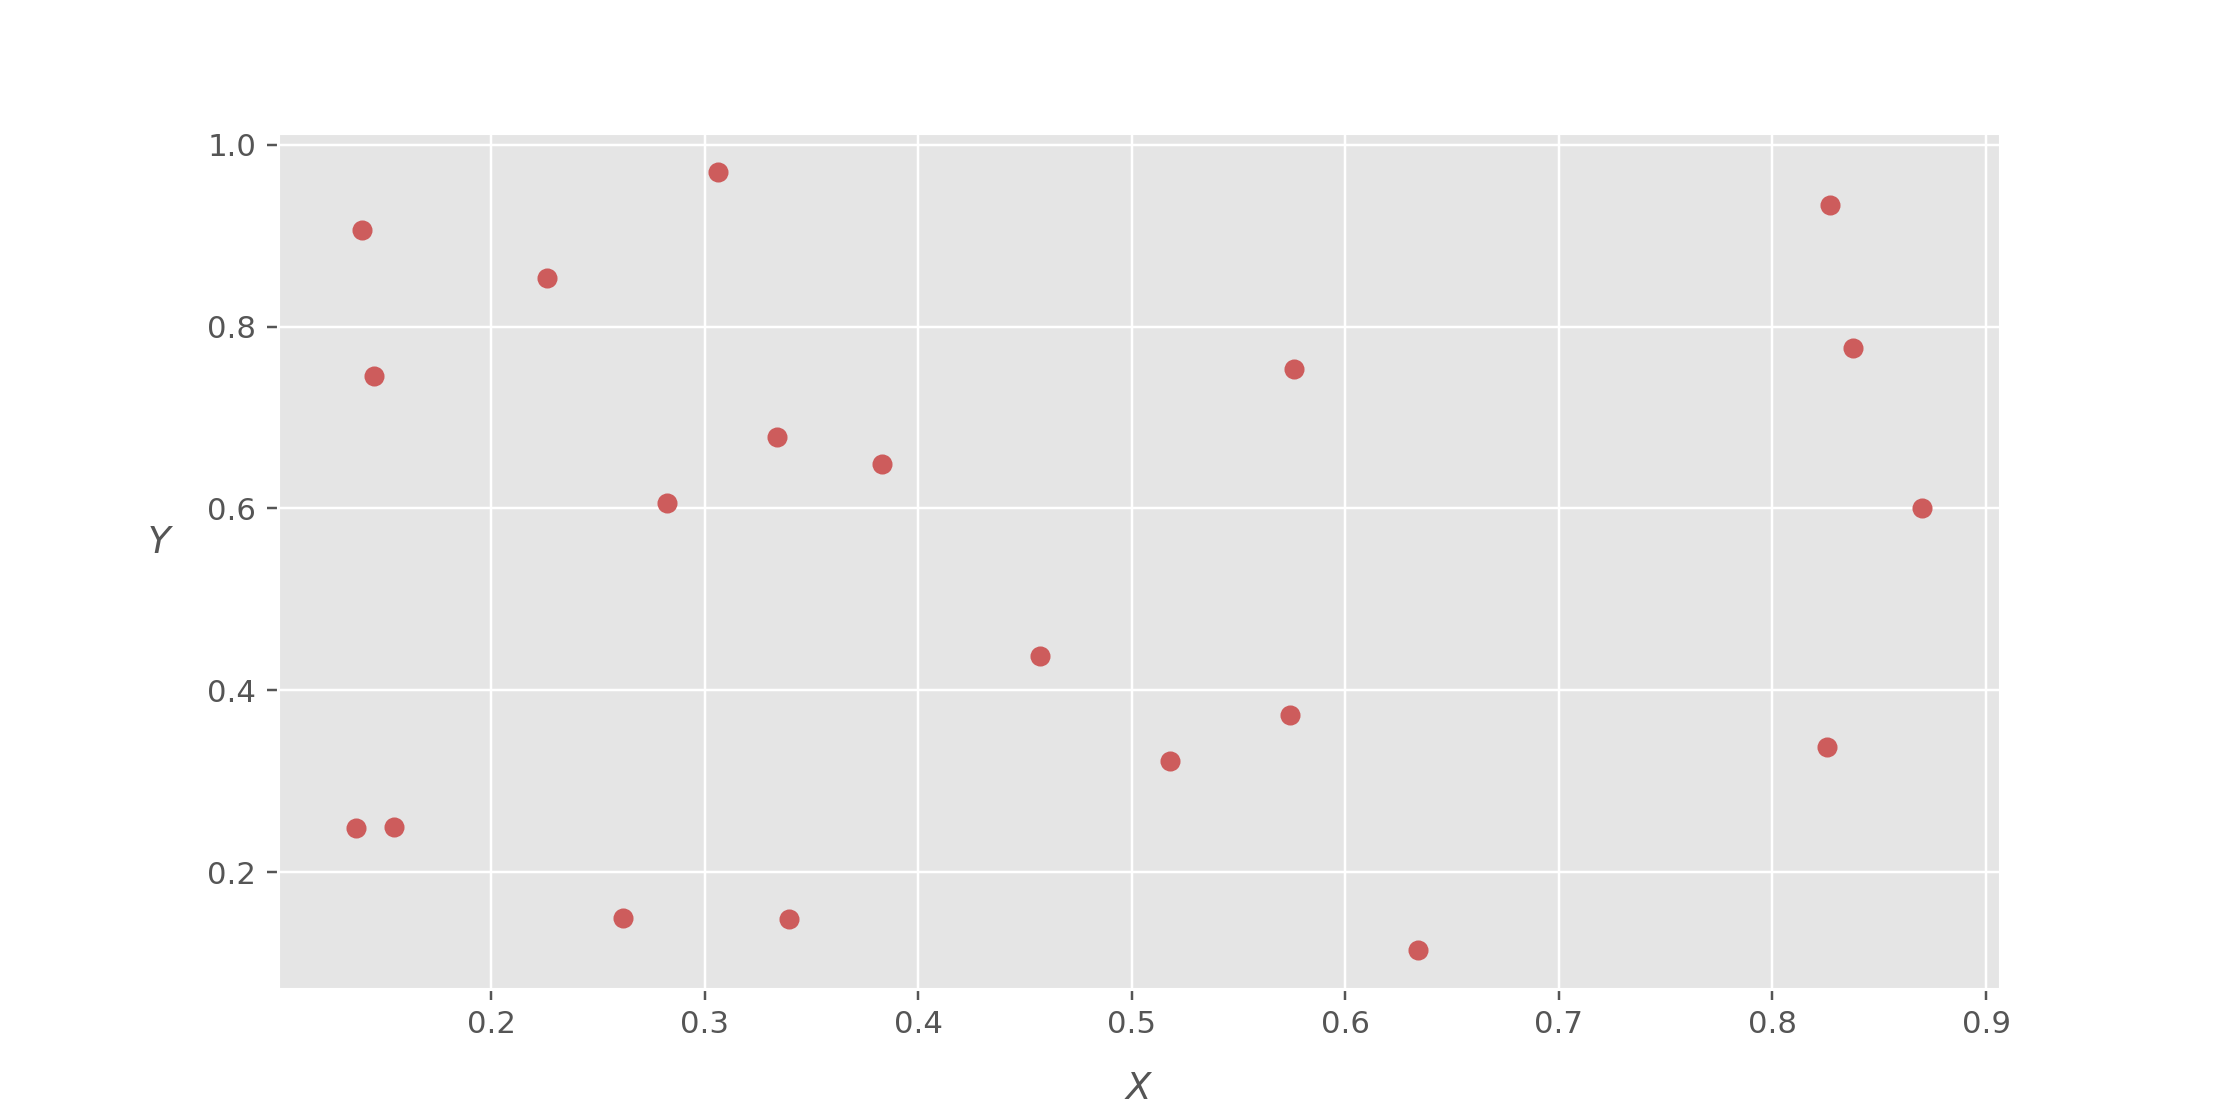

In [48]:
# Gráfico de nuestros puntos en el plano.
plt.figure(figsize=(10, 5))
plt.scatter(P[:, 0], P[:, 1], color="indianred")
plt.xlabel(r"$X$", fontsize=12, labelpad=10)
plt.ylabel(r"$Y$", fontsize=12, labelpad=15, rotation=0);

Recordemos, de la geometría analítica, que para dos puntos $P_{1}=(x_{1},y_{1})$ y $P_{2}=(x_{2},y_{2})$, la distancia $d(P_{1},P_{2})$ puede calcularse como

<p style="text-align: center;">$d(P_{1},P_{2})=\Vert P_{1}-P_{2}\Vert={\displaystyle \sqrt{(x_{1}-x_{2})^{2}+( y_{1}-y_{2})^{2}}}$</p>

El algoritmo de K-vecinos más cercanos corresponde a un procedimiento que asigna ciertos valores o características a un punto dependiendo de su distancia al resto de los puntos en un espacio determinado. Corresponde a uno de los modelos de clasificación más sencillos que podemos implementar.

Dado que este algoritmo funciona en base a las distancias a fin de poder establecer qué tan cerca está un punto de otro, podemos construir una matriz de distancias cruzadas entre cada par de puntos. Si disponemos de $n$ puntos, tal matriz será de dimensión $n\times n$. De esta manera, para nuestro arreglo `P`, dicha matriz corresponderá a un arreglo de geometría `(20, 20)`, que podemos construir de la siguiente manera:

In [49]:
# Construimos una matriz llamada dist, para almacenar las distancias que calcularemos.
dist = np.zeros(shape=(20, 20))

In [50]:
# Mediante un loop sencillo, calculamos estas distancias.
for i in range(P.shape[0]):
    for j in range(P.shape[0]):
        dist_ij = np.sum((P[i] - P[j])**2)
        dist[i, j] = dist_ij

Sólo para hacer un doble chequeo de lo que estamos haciendo, deberíamos observar los valores en la diagonal de esta matriz. Tales valores corresponden a las distancias entre un punto consigo mismo y, por supuesto, éstas deben ser iguales a cero:

In [51]:
# Doble check de nuestro cálculo.
dist.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

¡Excelente! Con las distancias entre pares de puntos ya resueltas, podemos utilizar la función `np.argsort()` para ordenar los elementos por fila. Las columnas de más a la izquierda nos darán los índices de los vecinos más cercanos:

In [52]:
# Determinamos las posiciones, en nuestra matriz de distancias, de los puntos más cercanos a cada punto.
nearest = np.argsort(dist, axis=1)
print(nearest)

[[ 0 18 11 19  7 17 15  1 16 14 12  2  9  8 10 13  5  3  6  4]
 [ 1 14  9 15  2  8 11 17  6  5 18  3  7  4  0 19 16 10 13 12]
 [ 2 15  1 11  6 14  9  0  5 18 17  8  7  4  3 19 16 10 12 13]
 [ 3  5  4  8  9 14  6  1 17 10 13  7 18 12 16 15  2 11  0 19]
 [ 4  5  3  6  9  8 14  1 17 10 13 18  2  7 15 12 16 11  0 19]
 [ 5  4  3  6  9  8 14  1 17 18  7  2 10 13 15 11 12 16  0 19]
 [ 6  5  4  3  9 14  1  8  2 17 15 18 11  7 10 13  0 12 16 19]
 [ 7 18 17 19 16  0 12 14  8 10 13  9  1 11 15  3  5  6  2  4]
 [ 8  9 14  3 17  5  1  4  6  7 18 10 13 12 16 15 11 19  0  2]
 [ 9 14  8  3  5  1 17  6  4 18  7 10 13 15 16 12 11  2  0 19]
 [10 13 12 16 17  7  8 18 14  9  3 19  5  1  4  0  6 11 15  2]
 [11 15  0  1  2 18 17  7 14 19  9  8  6  5 16  3 12  4 10 13]
 [12 16 10 13  7 17 19 18  8 14  9  0  3  1  5 11  4  6 15  2]
 [13 10 12 16 17  8  7 18 14  9  3 19  5  4  1  0  6 11 15  2]
 [14  9  8  1 17  3  5  6 18  7  4 10 13 15 11 16 12  2  0 19]
 [15  2 11  1  0 14 18 17  9  7  6  8  5 19  3  4 16 12

Notemos que la primera columna nos da los números de 0 a 19 en orden: Esto es debido a que cada vecino más cercano a un punto es sí mismo, como cabría esperar. Si estamos simplemente interesados en los K-vecinos más cercanos, todo lo que necesitamos es particionar cada fila de manera tal que las `K + 1` distancias más pequeñas vengan primero, dejando el resto de las distancias llenando el resto de los espacios en el arreglo. Podemos lograr esto con la función `np.argpartition()`:

In [53]:
# Buscamos los tres vecinos más cercanos a cada punto.
K = 3
nearest_partition = np.argpartition(dist, K + 1, axis=1)

A fin de visualizar esta red de vecinos más cercanos, grafiquemos rápidamente los puntos y las líneas que representan las conexiones de cada punto a sus tres vecinos más cercanos. No es el objetivo de esta sección el aprender a graficar, pero no está demás empezar a tener una noción de cómo hacerlo:

<IPython.core.display.Javascript object>


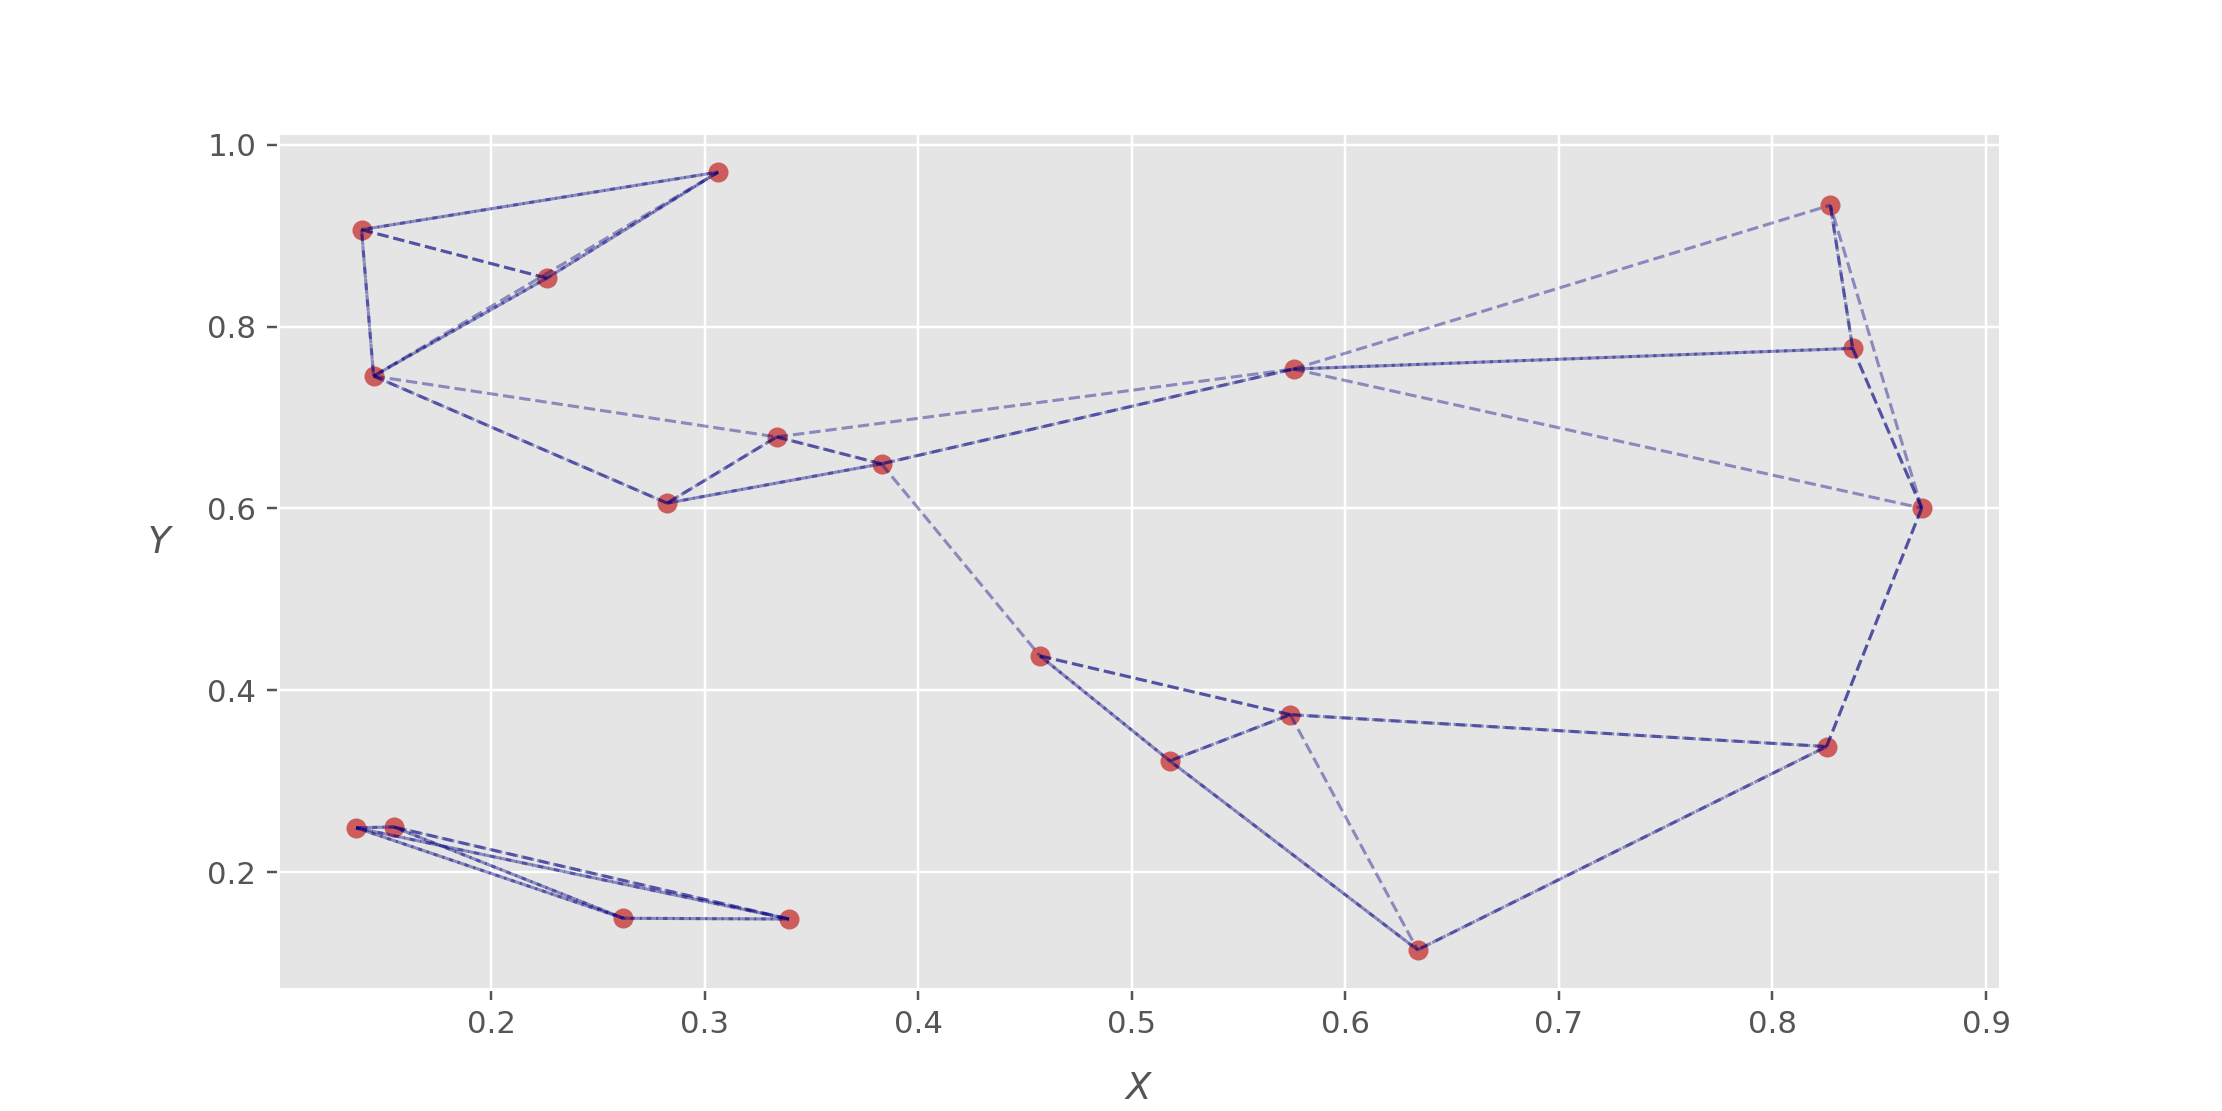

In [54]:
# Inicializamos nuestra figura.
plt.figure(figsize=(10, 5))
plt.scatter(P[:, 0], P[:, 1], color="indianred")

# Graficamos las conexiones a los tres vecinos más cercanos de cada punto.
K = 3
for i in range(P.shape[0]):
    for j in nearest_partition[i, :K + 1]:
        # Graficamos una línea desde P[i] hasta P[j].
        # Usamos la magia de la función zip() de Python para lograrlo.
        plt.plot(*zip(P[j], P[i]), color='navy', linewidth=1, linestyle="--", alpha=0.4)

plt.xlabel(r"$X$", fontsize=12, labelpad=10)
plt.ylabel(r"$Y$", fontsize=12, labelpad=15, rotation=0);

Cada punto en el gráfico tiene líneas que lo conectan a sus tres vecinos más cercanos. En un primer vistazo, puede parecer extraño que haya puntos con más de tres líneas saliendo de ellos. Esto ocurre porque `A` puede ser el vecino más cercano de `B`, pero eso no necesariamente significa que B sea el vecino más cercano de `A`. ◼︎

## Reemplazo de los elementos de un arreglo.
Con frecuencia, estamos interesados en reemplazar los elementos de un arreglo en función de alguna condición en particular. Por ejemplo, si disponemos de un arreglo que contiene información relativa al rendimiento horario de un circuito de molienda en una planta concentradora, podríamos querer eliminar las entradas que estén por debajo de un umbral mínimo de tratamiento. Supongamos pues que un molino tiene un rendimiento promedio de 1800 tph, con una desviación de 650 tph y distribución normal:

In [55]:
# Arreglo T, con 1000 horas de valores medios de tratamiento de 1800 tph, desviación de 780 tph
# y distribución normal.
T = rng.normal(loc=1800, scale=650, size=1000)

Supongamos que, por un lineamiento del área de metalurgia en esta planta, todo análisis que se realice relativo a la evolución del tratamiento de molienda no debe considerar rendimientos menores a 1200 tph. Una opción sería reemplazar tales valores por registros nulos, que indiquen a **Numpy** que no hay valores en tales filas (por ejemplo, codificando estas entradas con `np.nan`). Podemos hacer ese reemplazo mediante la función `np.where()`:

In [56]:
# Generamos el reemplazo requerido.
T_corr = np.where(T < 1200, np.nan, T)

Vemos pues que la función `np.where()` toma tres inputs: La condición a revisar, el valor que debemos imputar en el arreglo para reemplazar las entradas que cumplan con esta condición, y los valores a imputar cuando tal condición no se cumple.

Podemos graficar este arreglo para verificar que, en efecto, hemos reemplazado todos los valores menores que 1200 tph por entradas de tipo `nan`:

<IPython.core.display.Javascript object>


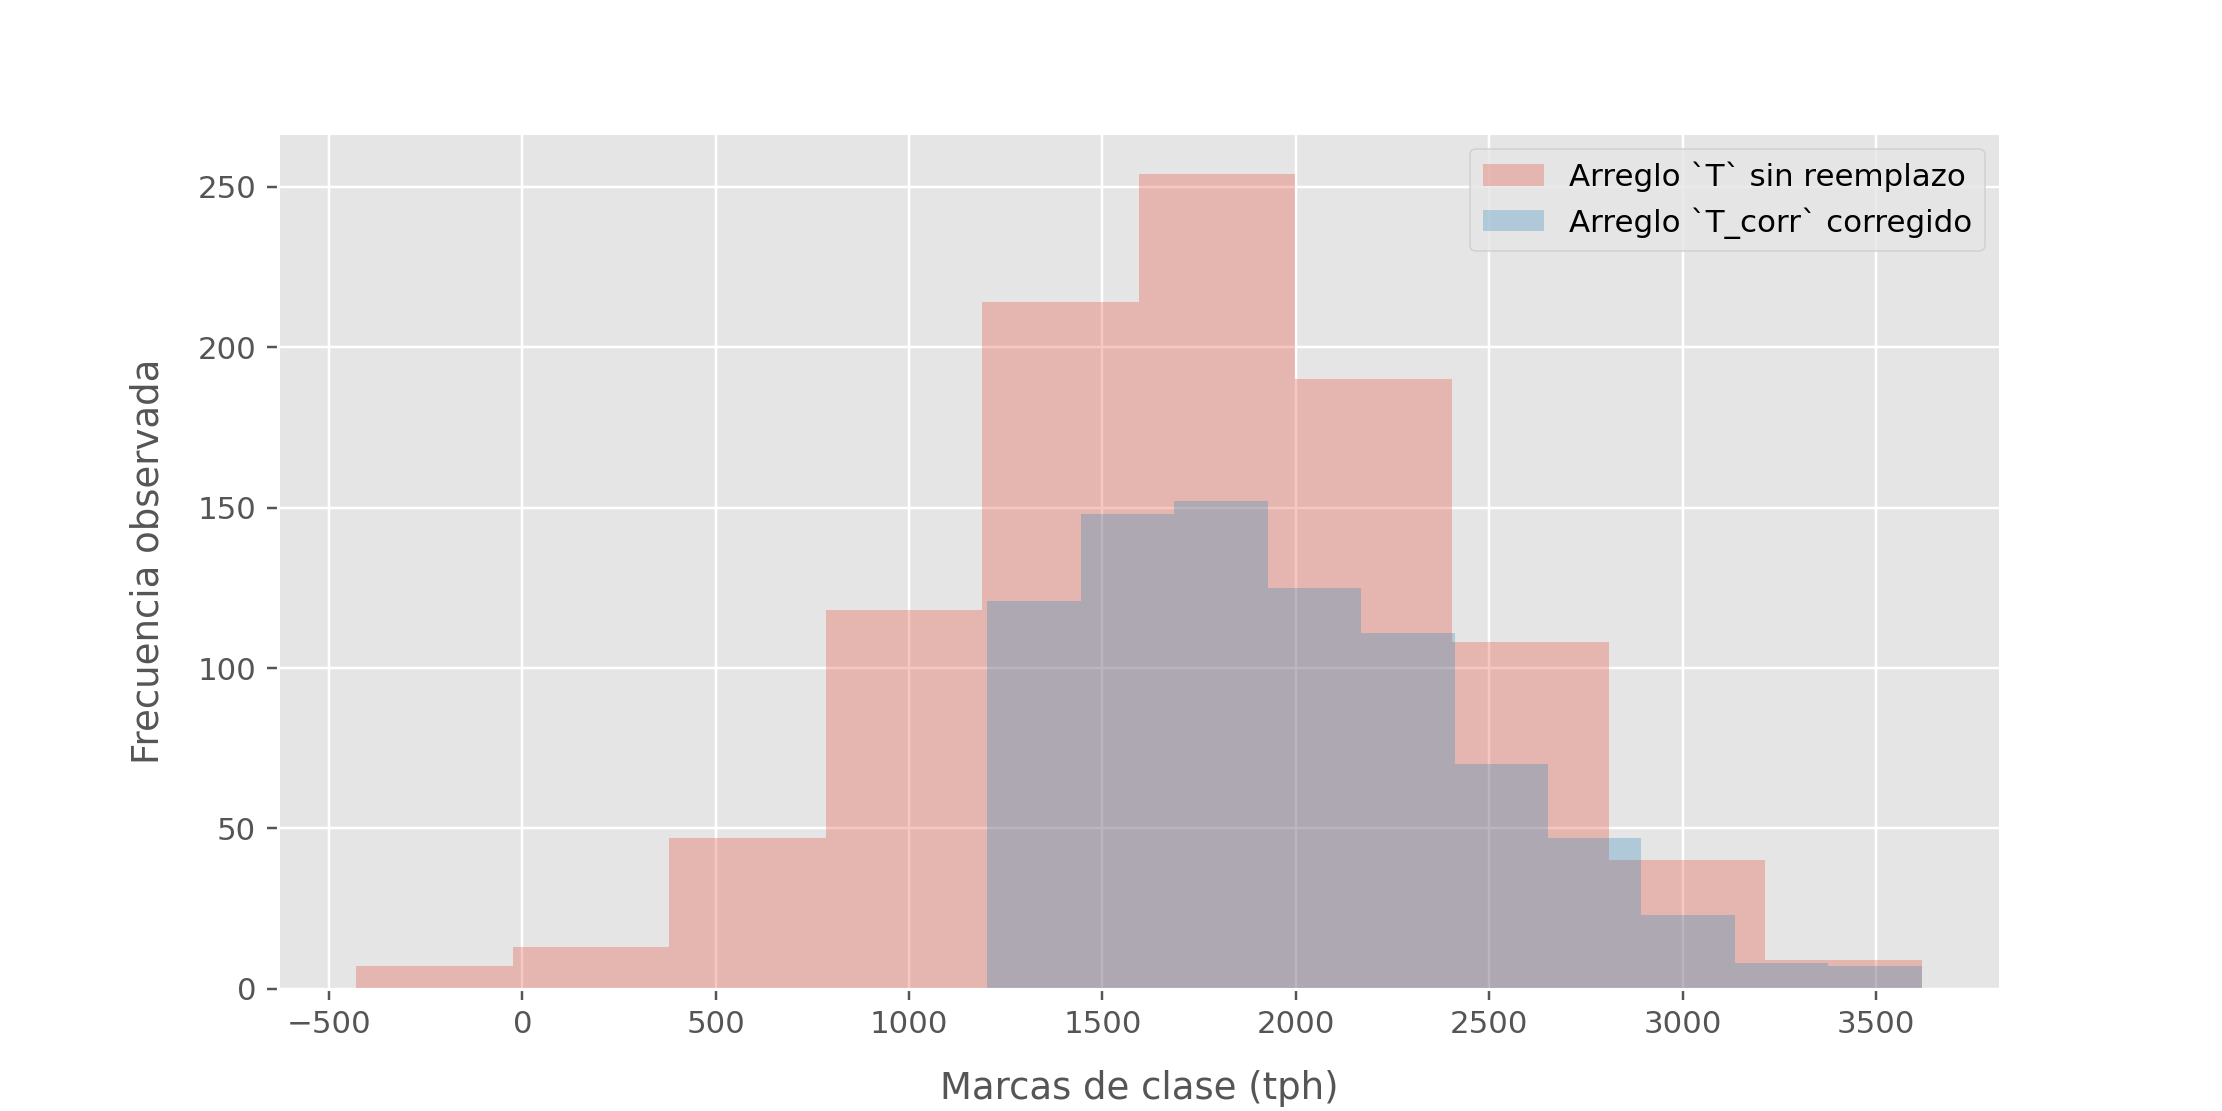

In [57]:
plt.figure(figsize=(10, 5))
plt.hist(T, label="Arreglo `T` sin reemplazo", alpha=0.3)
plt.hist(T_corr, label="Arreglo `T_corr` corregido", alpha=0.3)
plt.legend(loc="best", frameon=True)
plt.xlabel("Marcas de clase (tph)", fontsize=12, labelpad=10)
plt.ylabel("Frecuencia observada", fontsize=12, labelpad=10);

## Comentarios finales.
Lo que hemos visto en esta sección permite dar por finalizado el aprendizaje de los elementos, operaciones y manipulaciones de datos fundamentales mediante el uso de la librería **Numpy**. En la siguiente sección, revisaremos dos aplicaciones importantes de los conocimientos que hemos adquirido en estas notas con el objetivo de poner en práctica estas herramientas.